# Algerian Forest Fire dataset Linear Regression Techniques Implementaion

Linkedin: https://www.linkedin.com/in/satya-nerurkar-9b0655190/ <br>
Github: https://github.com/SatyaNerurkar

### Exploratory Data Analysis & Feature Engineering

1. Data profiling
2. Statistical analysis
3. Data cleaning
4. Data scaling

### Linear Regression 

1. Linear regression
2. Performance metrics for linear regression
3. Lasso regression
4. Performance metrics for lasso regression
5. Ridge regression
6. Performance metrics for ridge regression
7. ElasticNet regression
8. Performance metrics for ElasticNet regression

### Import Data and Required Packages

In [1]:
# Importing Pandas, Numpy, Matplotlib, Seaborn, plotly and Warings Library.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

# Display enitre dataset in output cell.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Download and Import the CSV Data as Pandas DataFrame

In [2]:
# Importing top 122 rows from CSV file that contain data for Bejaia Region.

Bejaia_df = pd.read_csv('C:\\Users\\vishw\\OneDrive\\Documents\\Satya\\DS\\ineuron\\EDA\\Dataset\\AlgerianForestFire\\Algerian_forest_fires_dataset_UPDATE.csv',
                 header=1,nrows=122)

# Creating Region column and assigning value Bejaia for first 122 rows.
Bejaia_df['Region'] = 'Bejaia'

In [3]:
# Importing rest of data from CSV file that contain data for Sidi-Bel Abbes Region.
SidiBel_Abbes_df = pd.read_csv('C:\\Users\\vishw\\OneDrive\\Documents\\Satya\\DS\\ineuron\\EDA\\Dataset\\AlgerianForestFire\\Algerian_forest_fires_dataset_UPDATE.csv',
header=125)

# Creating Region column and assigning value Sidi-Bel Abbes for remaining rows.
SidiBel_Abbes_df['Region'] = 'Sidi-Bel Abbes'

In [4]:
# performed concat operation along columns to get final dataframe.

df = pd.concat([Bejaia_df, SidiBel_Abbes_df], axis=0, ignore_index=True)

In [5]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [6]:
# Validating first 3 rows from dataframe.

df.head(3)

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC   DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4  7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1  7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5  7.1  0.3  2.7   

   FWI    Classes    Region       date  
0  0.5  not fire     Bejaia 2012-06-01  
1  0.4  not fire     Bejaia 2012-06-02  
2  0.1  not fire     Bejaia 2012-06-03

In [7]:
# Validating last 3 rows from dataframe.

df.tail(3)

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  \
241   28      9  2012           27   87   29    0.5  45.9  3.5   7.9  0.4   
242   29      9  2012           24   54   18    0.1  79.7  4.3  15.2  1.7   
243   30      9  2012           24   64   15    0.2  67.3  3.8  16.5  1.2   

     BUI  FWI     Classes            Region       date  
241  3.4  0.2   not fire     Sidi-Bel Abbes 2012-09-28  
242  5.1  0.7   not fire     Sidi-Bel Abbes 2012-09-29  
243  4.8  0.5  not fire      Sidi-Bel Abbes 2012-09-30

In [8]:
# Shape of the dataset

print("This dataset contains {} rows and {} columns.".format(df.shape[0],df.shape[1]))

This dataset contains 244 rows and 16 columns.


In [9]:
# Check Null and Dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    int64         
 1   month        244 non-null    int64         
 2   year         244 non-null    int64         
 3   Temperature  244 non-null    int64         
 4    RH          244 non-null    int64         
 5    Ws          244 non-null    int64         
 6   Rain         244 non-null    float64       
 7   FFMC         244 non-null    float64       
 8   DMC          244 non-null    float64       
 9   DC           244 non-null    object        
 10  ISI          244 non-null    float64       
 11  BUI          244 non-null    float64       
 12  FWI          244 non-null    object        
 13  Classes      243 non-null    object        
 14  Region       244 non-null    object        
 15  date         244 non-null    datetime64[ns]
dtypes: datet

**Attribute Information:**

    01. Date : (DD/MM/YYYY)Day, month('june' to 'september'), year(2012) Weather data observations
    02. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
    03. RH : Relative Humidity in %: 21 to 90
    04. Ws : Wind speed in km/h: 6 to 29
    05. Rain: total day in mm: 0 to 16.8 FWI Components
    06. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
    07. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
    08. Drought Code (DC) index from the FWI system: 7 to 220.4
    09. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
    10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
    11. Fire Weather Index (FWI) Index: 0 to 31.1
    12. Classes: two classes, namely Fire and not Fire

**Additional Information about given features.**

- Fine Fuel Moisture Code:
    The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.

- Duff Moisture Code:
    The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.

- Drought Code:
    The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

- Initial Spread Index:
    The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC. Like the rest of the FWI system components, ISI does not take fuel type into account. Actual spread rates vary between fuel types at the same ISI.

- Buildup Index:
    The Buildup Index (BUI) is a numeric rating of the total amount of fuel available for combustion. It is based on the DMC and the DC. The BUI is generally less than twice the DMC value, and moisture in the DMC layer is expected to help prevent burning in material deeper down in the available fuel.

- Fire Weather Index:
    The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.

### Data cleaning 

In [10]:
# Renaming column names so as to remove white spaces

df['Classes  '] = df['Classes  '].str.strip()

df.rename(columns = {'Classes  ':'Classes', ' RH':'RH',' Ws':'Ws', 'Rain ':'Rain'}, inplace = True)

In [11]:
# Removing row that contains null data.

df = df.dropna()

In [12]:
# No null values present in the dataset.

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
date           0
dtype: int64

### Profile of the dataset 

In [13]:
# Display summary statistics for a numerical features from dataframe.

df.describe().T

count         mean        std     min      25%     50%      75%  \
day          243.0    15.761317   8.842552     1.0     8.00    16.0    23.00   
month        243.0     7.502058   1.114793     6.0     7.00     8.0     8.00   
year         243.0  2012.000000   0.000000  2012.0  2012.00  2012.0  2012.00   
Temperature  243.0    32.152263   3.628039    22.0    30.00    32.0    35.00   
RH           243.0    62.041152  14.828160    21.0    52.50    63.0    73.50   
Ws           243.0    15.493827   2.811385     6.0    14.00    15.0    17.00   
Rain         243.0     0.762963   2.003207     0.0     0.00     0.0     0.50   
FFMC         243.0    77.842387  14.349641    28.6    71.85    83.3    88.30   
DMC          243.0    14.680658  12.393040     0.7     5.80    11.3    20.80   
ISI          243.0     4.742387   4.154234     0.0     1.40     3.5     7.25   
BUI          243.0    16.690535  14.228421     1.1     6.00    12.4    22.65   

                max  
day            31.0  
month           9.0  
year         2012.0  
Temperature    42.0  
RH             90.0  
Ws             29.0  
Rain           16.8  
FFMC           96.0  
DMC            65.9  
ISI            19.0  
BUI            68.0

In [14]:
# Display summary for a categorical features from dataframe.

df.describe(include = 'object').T

count unique     top freq
DC         243    212     8.2    4
FWI      243.0  160.0     0.5  7.0
Classes    243      2    fire  137
Region     243      2  Bejaia  122

In [15]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [16]:
# The Drought Code (DC) and Fire Weather Index (FWI) are numeric columns 
# hence converting them into float datatype
df['DC'] = df['DC'].astype('float64')
df['FWI'] = df['FWI'].astype('float64')

### EXPLORING DATA 

In [17]:
# define numerical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# print numerical columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

We have 14 numerical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'date']


In [18]:
# define categorical columns
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print categorical columns
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 categorical features : ['Classes', 'Region']


In [19]:
# Highest temperature in the dataset.
highest_temp = df.sort_values(by='Temperature', ascending=False)[['month', 'day', 'Rain', 'Temperature']].head()

# Lowest temperature in the dataset.
lowest_temp =  df.sort_values(by='Temperature', ascending=True)[['month', 'day', 'Rain', 'Temperature']].head()

print("Highest Temperature")

print(highest_temp)
print('*'*35)
print("Lowest Temperature")
print(lowest_temp)

Highest Temperature
     month  day  Rain  Temperature
199      8   17   0.0           42
193      8   11   0.0           40
184      8    2   0.0           40
198      8   16   0.1           40
176      7   25   1.2           39
***********************************
Lowest Temperature
     month  day  Rain  Temperature
105      9   14   8.3           22
93       9    2  10.1           22
243      9   30   0.2           24
242      9   29   0.1           24
106      9   15   0.4           24


In [20]:
# Highest Rainfall in the dataset.
highest_rain = df.sort_values(by='Rain', ascending=False)[['month', 'day', 'Rain', 'Temperature']].head()

# Highest Rainfall in the dataset.
lowest_rain =  df.sort_values(by='Rain', ascending=True)[['month', 'day', 'Rain', 'Temperature']].head()

print("Highest Rainfall")

print(highest_rain)
print('*'*35)
print("Lowest Rainfall")
print(lowest_rain)

Highest Rainfall
     month  day  Rain  Temperature
91       8   31  16.8           28
2        6    3  13.1           26
93       9    2  10.1           22
139      6   18   8.7           33
105      9   14   8.3           22
***********************************
Lowest Rainfall
     month  day  Rain  Temperature
0        6    1   0.0           29
203      8   21   0.0           36
202      8   20   0.0           36
96       9    5   0.0           29
200      8   18   0.0           37


In [21]:
# Highest Fine Fuel Moisture Code values in dataset
highest_FFMC = df.sort_values(by='FFMC', ascending=False)[['month', 'day', 'Rain', 'Temperature', 'FFMC']].head()

# Lowest Fine Fuel Moisture Code values in dataset
lowest_FFMC =  df.sort_values(by='FFMC', ascending=True)[['month', 'day', 'Rain', 'Temperature', 'FFMC']].head()

print("Highest Fine Fuel Moisture Code")

print(highest_FFMC)
print('*'*35)
print("Lowest Fine Fuel Moisture Code")
print(lowest_FFMC)

Highest Fine Fuel Moisture Code
     month  day  Rain  Temperature  FFMC
199      8   17   0.0           42  96.0
200      8   18   0.0           37  94.3
193      8   11   0.0           40  94.2
229      9   16   0.0           33  93.9
172      7   21   0.0           36  93.9
***********************************
Lowest Fine Fuel Moisture Code
     month  day  Rain  Temperature  FFMC
3        6    4   2.5           25  28.6
93       9    2  10.1           22  30.5
15       6   16   0.7           29  36.1
16       6   17   0.6           30  37.3
214      9    1   0.0           29  37.9


In [22]:
# Highest Buildup Index (BUI) values in dataset
highest_BUI = df.sort_values(by='BUI', ascending=False)[['month', 'day', 'Rain', 'Temperature', 'BUI']].head()

# Lowest Buildup Index (BUI) values in dataset
lowest_BUI =  df.sort_values(by='BUI', ascending=True)[['month', 'day', 'Rain', 'Temperature', 'BUI']].head()

print("Highest Buildup Index")

print(highest_BUI)
print('*'*35)
print("Lowest Buildup Index")
print(lowest_BUI)

Highest Buildup Index
     month  day  Rain  Temperature   BUI
209      8   27   0.0           36  68.0
89       8   29   0.0           35  67.4
208      8   26   0.0           33  64.0
88       8   28   0.0           34  62.9
207      8   25   0.0           34  59.5
***********************************
Lowest Buildup Index
     month  day  Rain  Temperature  BUI
93       9    2  10.1           22  1.1
214      9    1   0.0           29  1.4
106      9   15   0.4           24  1.4
16       6   17   0.6           30  1.6
105      9   14   8.3           22  1.6


In [23]:
# Highest Fire Weather Index (FWI) values in dataset
highest_FWI = df.sort_values(by='FWI', ascending=False)[['month', 'day', 'Temperature', 'FWI']].head()

# Lowest Fire Weather Index (FWI) values in dataset
lowest_FWI =  df.sort_values(by='FWI', ascending=True)[['month', 'day', 'Temperature', 'BUI']].head()

print("Highest Fire Weather Index")

print(highest_FWI)
print('*'*35)
print("Lowest Fire Weather Index")
print(lowest_FWI)

Highest Fire Weather Index
     month  day  Temperature   FWI
207      8   25           34  31.1
208      8   26           33  30.3
89       8   29           35  30.2
172      7   21           36  30.0
206      8   24           35  26.9
***********************************
Lowest Fire Weather Index
     month  day  Temperature  BUI
104      9   13           25  1.8
3        6    4           25  1.7
240      9   27           28  6.2
93       9    2           22  1.1
94       9    3           25  1.7


### Initial Analysis report 

- August month is the hottest month followed by july in the given data with highest recorded temperature is 42°C and September month is colder month with lowest recorded temperature is 22°C.
- September and June month received more rainfall than July and August month.
- Fine Fuel Moisture Code, Fire Weather Index, Buildup Index is high in August month when temperature in higher and low in September month when temperature is lower.

## Visualization

### Univariate Analysis 

In [24]:
# Displaying Skewness in the features.

df.skew()

day            0.000365
month         -0.005207
year           0.000000
Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
dtype: float64

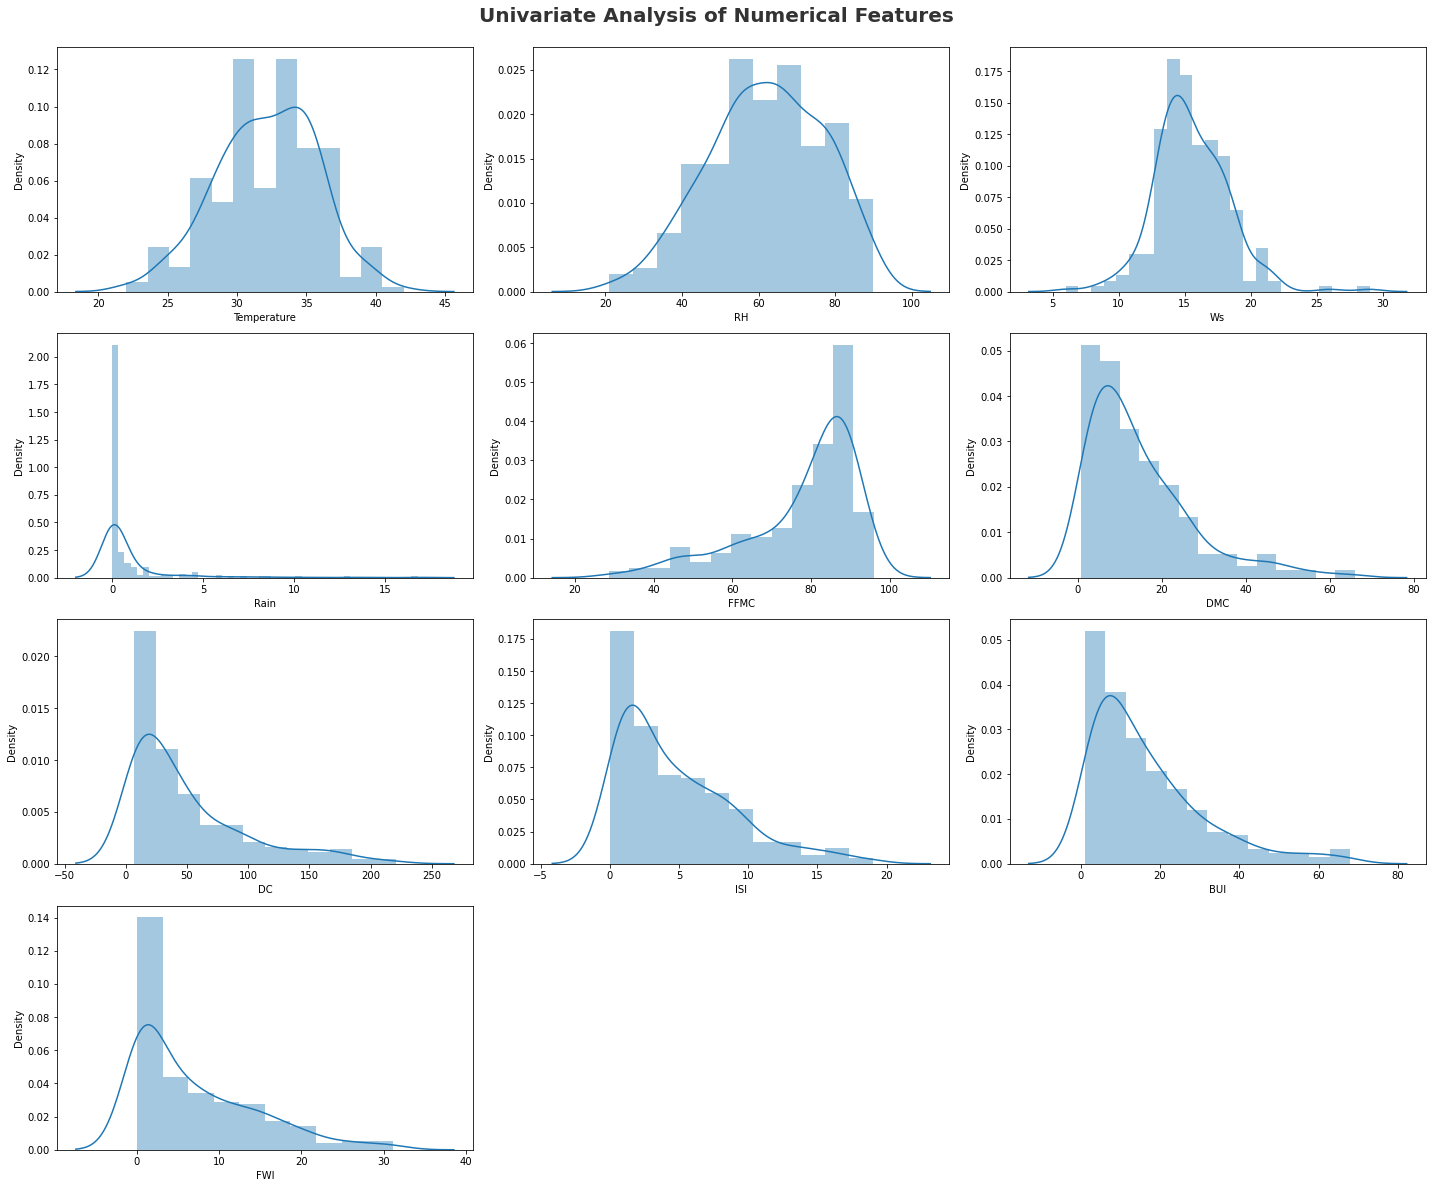

In [25]:
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_cols =['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] 

for i in range(0, len(numeric_cols)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=df[numeric_cols[i]],kde=True)
    plt.xlabel(numeric_cols[i])
    plt.tight_layout()

In [26]:
for feature in numeric_cols:
    fig = go.Figure()

    fig.add_trace(go.Box(
    y=df[feature],
    name=feature,
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(51, 103, 255)',
    line_color='rgb(51, 205, 255)'))

    fig.update_layout(title_text="Box Plot For Outliers in "+feature)
    fig.show()

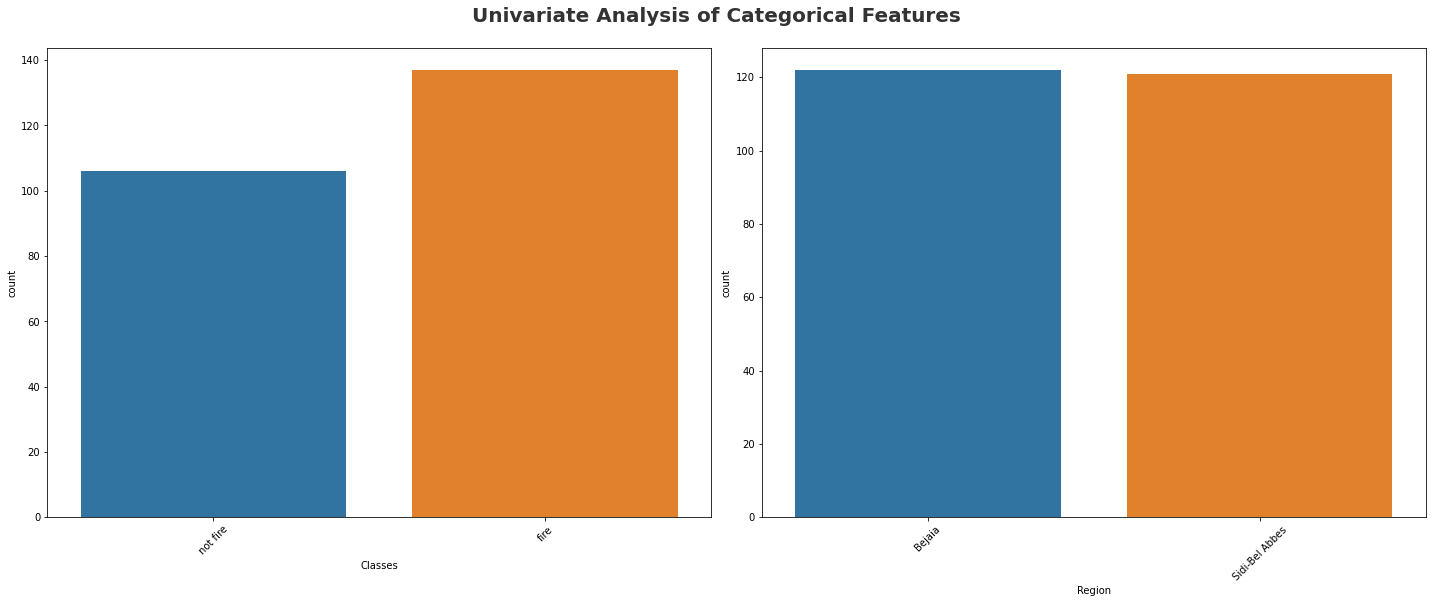

In [27]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [28]:
fig = px.histogram(df, x="Temperature", color="Region", marginal="violin",hover_data=df.columns,
                  title="Temperature distribution in °C", width=800, height=600)
fig.update_layout(bargap=0.02)
fig.show()

Observations:
- Rain, Duff Moisture Code (DMC), Drought Code (DC), Buildup Index (BUI) are are right skewed and postively skewed. 
- Rain, Duff Moisture Code (DMC), Drought Code (DC), Buildup Index (BUI) has outliers.
- Temperature, Relative Humidity (RH), Wind speed (Ws) follow normal distribution

### Bivariate analysis and multivariate analysis

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

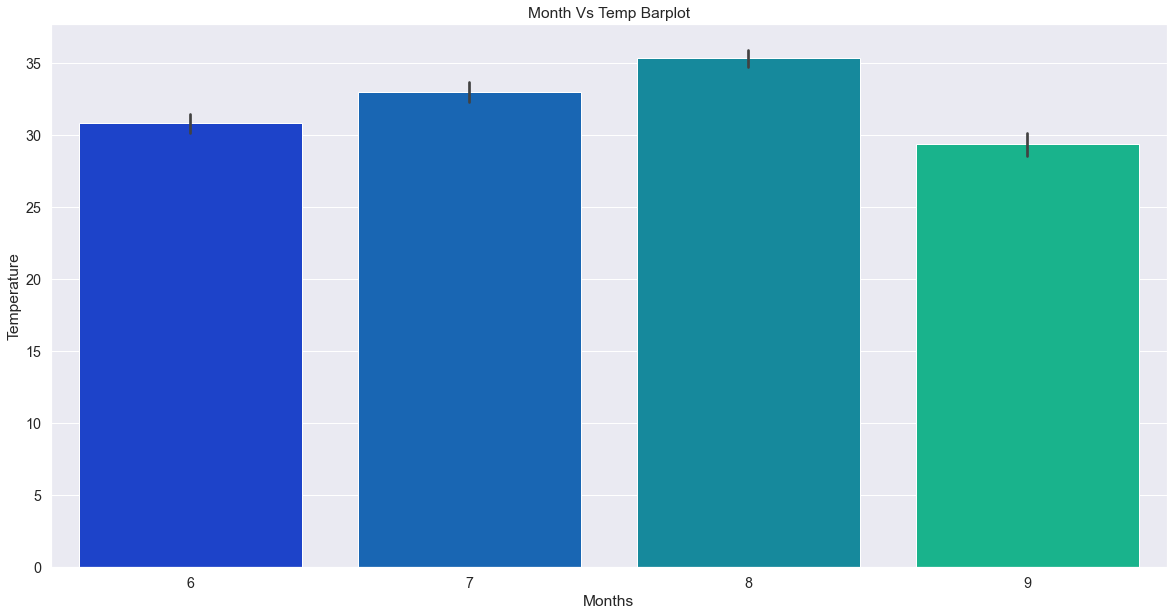

In [29]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'Temperature', data = df, palette = 'winter')
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

[Text(0.5, 1.0, 'Month Vs Rainfall Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Rain')]

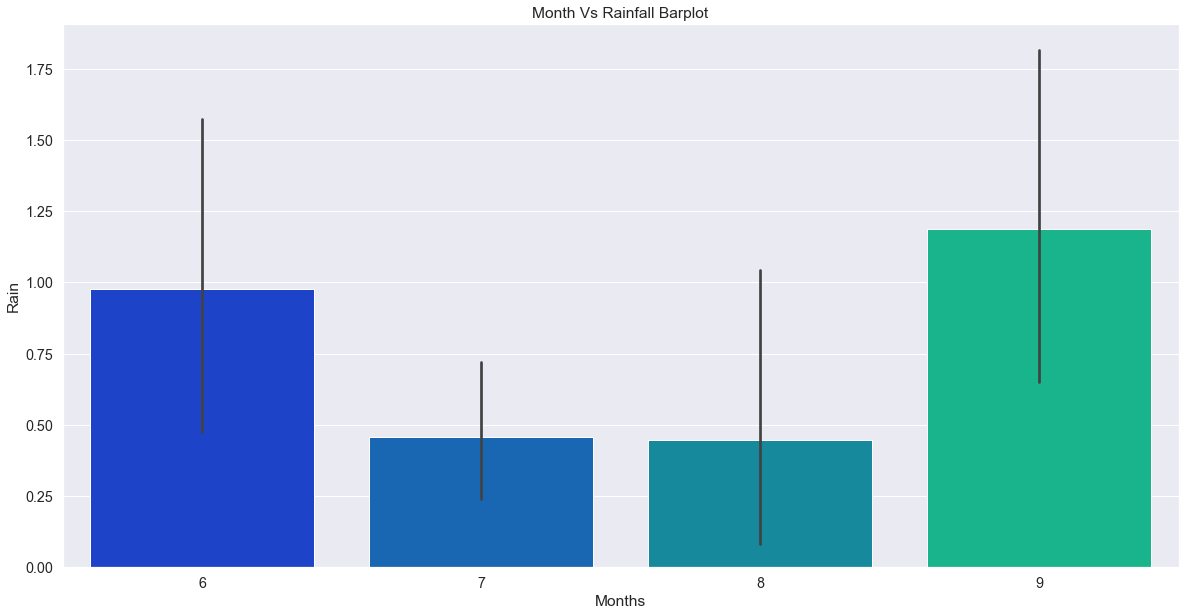

In [30]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'Rain', data = df, palette = 'winter')
month_temp.set(title = "Month Vs Rainfall Barplot", xlabel = "Months", ylabel = "Rain")

In [31]:
fig = px.scatter(df, x="FFMC", y="Temperature", color = 'Classes')
fig.show()

In [32]:
fig = px.scatter(df, x="Ws", y="FWI", color='Classes')
fig.show()

In [33]:
fig = px.scatter(df, x="FFMC", y="ISI", color='Classes')
fig.show()

In [34]:
fig = px.scatter(df, x='day', y="BUI", hover_data=['month'] ,color='Classes')
fig.show()

In [35]:
fig = px.scatter(df, x='Ws', y="Rain" ,color='Classes')
fig.show()

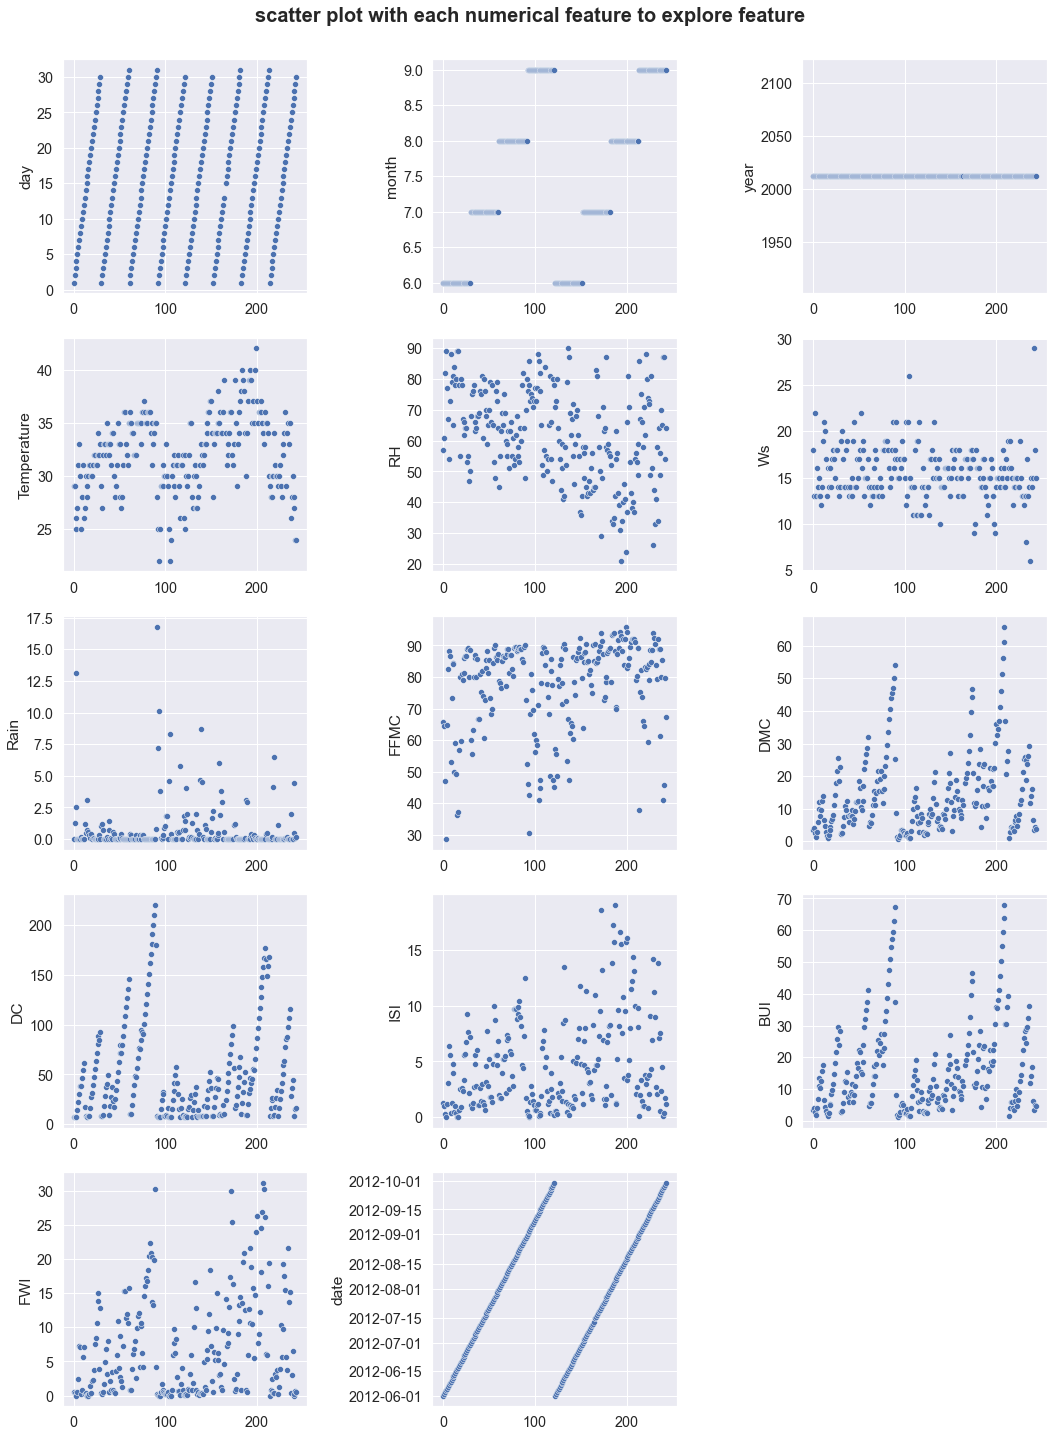

In [36]:
# scatter plot to see the trends in each numerical column

plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numeric_features[i], x=df.index, data=df)
    plt.tight_layout()

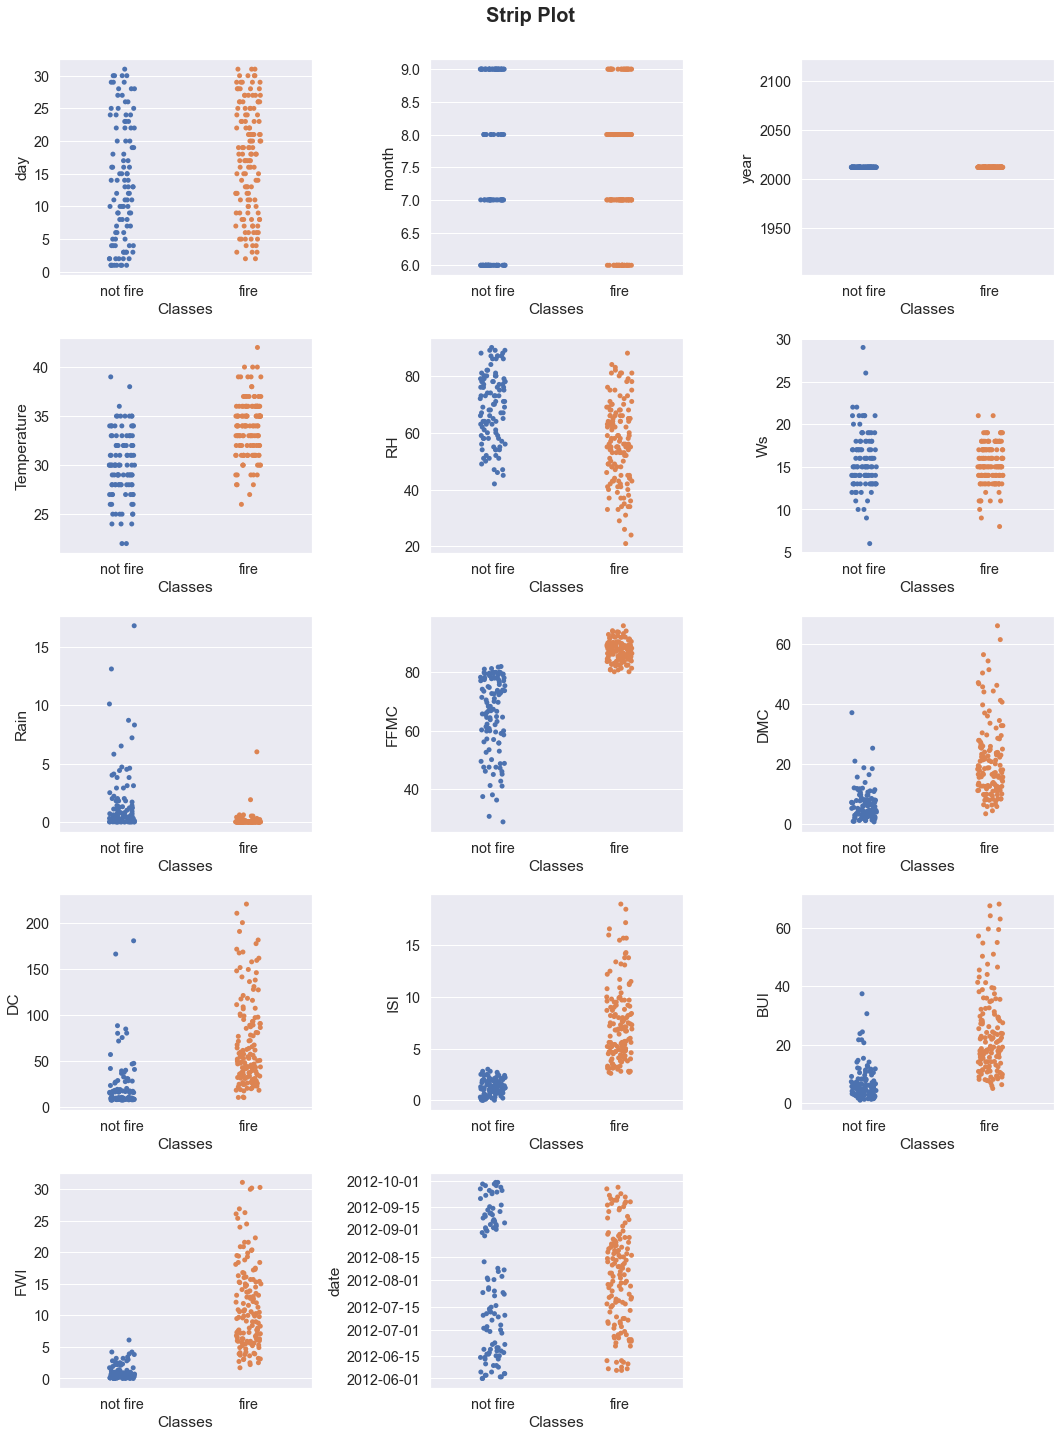

In [37]:
# strip plot to see the relationship between numerical features and target


plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numeric_features[i], x='Classes', data=df)
    plt.tight_layout()

Observation:
- Temperature is higher in  July and August month. This increases chances of forest fire in these months.
- Rainfall is higher in September month. From the chart above it is clear that temperature is relatively lower in this month. This decreases chances of forest fire in september month.
- Temperature greater than 25°C and Fine Fuel Moisture Code (FFMC) rating above 80 increases risk of forest fire.
- Wind speed between 10km/hr to 20km/hr and Fire Weather Index (FWI) index above 5 increases risk of forest fire.
- Fine Fuel Moisture Code (FFMC) rating greater than 80 and Initial Spread Index (ISI) index above 3 increases risk of forest fire.
- Buildup Index (BUI) is greater in August month which will increase risk of forest fire.

### Multicolleniarity in numerical features

In [38]:
df.corr()

day     month  year  Temperature        RH        Ws  \
day          1.000000 -0.000369   NaN     0.097227 -0.076034  0.047812   
month       -0.000369  1.000000   NaN    -0.056781 -0.041252 -0.039880   
year              NaN       NaN   NaN          NaN       NaN       NaN   
Temperature  0.097227 -0.056781   NaN     1.000000 -0.651400 -0.284510   
RH          -0.076034 -0.041252   NaN    -0.651400  1.000000  0.244048   
Ws           0.047812 -0.039880   NaN    -0.284510  0.244048  1.000000   
Rain        -0.112523  0.034822   NaN    -0.326492  0.222356  0.171506   
FFMC         0.224956  0.017030   NaN     0.676568 -0.644873 -0.166548   
DMC          0.491514  0.067943   NaN     0.485687 -0.408519 -0.000721   
DC           0.527952  0.126511   NaN     0.376284 -0.226941  0.079135   
ISI          0.180543  0.065608   NaN     0.603871 -0.686667  0.008532   
BUI          0.517117  0.085073   NaN     0.459789 -0.353841  0.031438   
FWI          0.350781  0.082639   NaN     0.566670 -0.580957  0.032368   

                 Rain      FFMC       DMC        DC       ISI       BUI  \
day         -0.112523  0.224956  0.491514  0.527952  0.180543  0.517117   
month        0.034822  0.017030  0.067943  0.126511  0.065608  0.085073   
year              NaN       NaN       NaN       NaN       NaN       NaN   
Temperature -0.326492  0.676568  0.485687  0.376284  0.603871  0.459789   
RH           0.222356 -0.644873 -0.408519 -0.226941 -0.686667 -0.353841   
Ws           0.171506 -0.166548 -0.000721  0.079135  0.008532  0.031438   
Rain         1.000000 -0.543906 -0.288773 -0.298023 -0.347484 -0.299852   
FFMC        -0.543906  1.000000  0.603608  0.507397  0.740007  0.592011   
DMC         -0.288773  0.603608  1.000000  0.875925  0.680454  0.982248   
DC          -0.298023  0.507397  0.875925  1.000000  0.508643  0.941988   
ISI         -0.347484  0.740007  0.680454  0.508643  1.000000  0.644093   
BUI         -0.299852  0.592011  0.982248  0.941988  0.644093  1.000000   
FWI         -0.324422  0.691132  0.875864  0.739521  0.922895  0.857973   

                  FWI  
day          0.350781  
month        0.082639  
year              NaN  
Temperature  0.566670  
RH          -0.580957  
Ws           0.032368  
Rain        -0.324422  
FFMC         0.691132  
DMC          0.875864  
DC           0.739521  
ISI          0.922895  
BUI          0.857973  
FWI          1.000000

In [39]:
fig = px.imshow(df.corr(), text_auto=True, width=800, height=800)
fig.show()

observation -

- Highly positive correlated features are DMC and BUI, DC and BUI, ISI and PWI
- Highly negative correlated features are RH and Temp, RH and FFMC, RH and ICI

### Final Report

There are three components needed for ignition and combustion to occur. A fire requires fuel to burn, air to supply oxygen, and a heat source to bring the fuel up to ignition temperature.
- Months like July and August with higher temperature has fire.
- Months like June and September with higher Rainfall helps lowering the temperature and provide more humidity in air thus decreasing risk of fire.
- High temperature along with wind speed provides more oxygen to the fire and may increase its intensity and spread. 
- Factors such as temperature greater than 25°C, Fine Fuel Moisture Code (FFMC) rating above 80, Wind speed between 10km/hr to 20km/hr and Fire Weather Index (FWI) index above 5 increases risk of forest fire.

<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

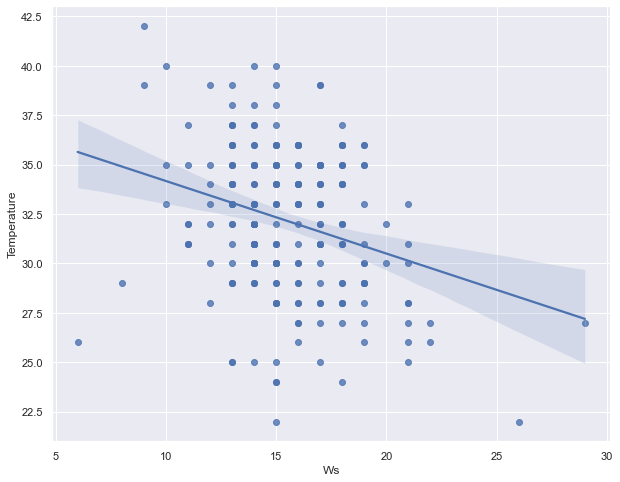

In [40]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x = "Ws", y = "Temperature", data = df)

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

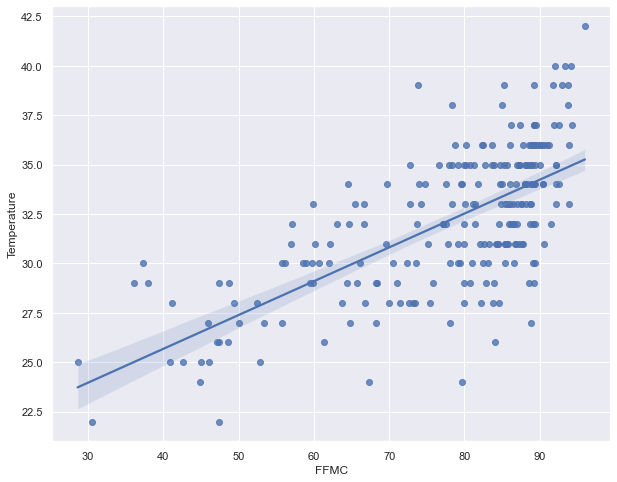

In [41]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x="FFMC",y="Temperature",data=df)

<AxesSubplot:xlabel='ISI', ylabel='Temperature'>

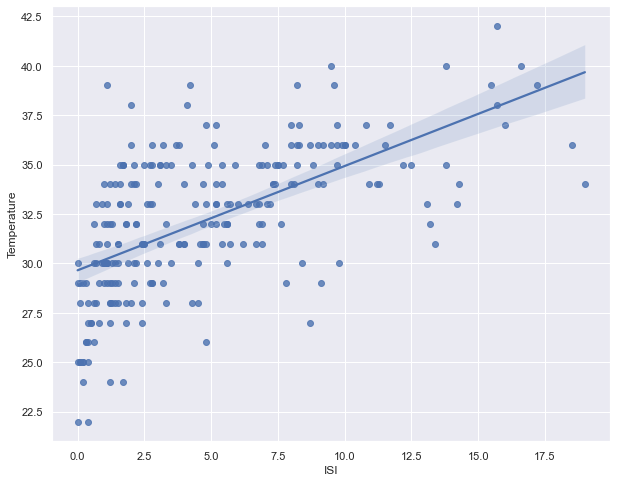

In [42]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x="ISI",y="Temperature",data=df)

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

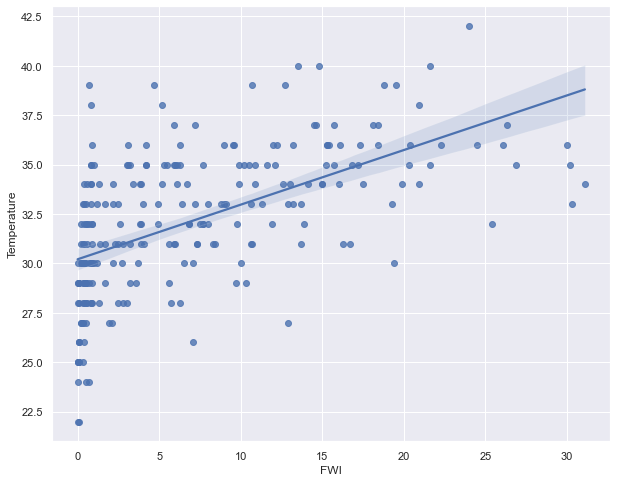

In [43]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x="FWI",y="Temperature",data=df)

In [44]:
fig = px.box(df, x="Temperature", points = 'all')
fig.show()

In [45]:
fig = px.box(df, x="FFMC", points = 'all')
fig.show()

converting categorical columns into numerical columns

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
df['Classes_Encoded'] = le.fit_transform(df['Classes'])

df['Region_Encoded'] = le.fit_transform(df['Region'])

In [49]:
# Dropping unnecessary columns

df = df.drop(columns = ('Classes'),  axis = 1)
df = df.drop(columns = ('Region'),  axis = 1)
df = df.drop(columns = ('date'),  axis = 1)

In [50]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes_Encoded  Region_Encoded  
0  0.5                1               0  
1  0.4                1               0  
2  0.1                1               0  
3  0.0                1               0  
4  0.5                1               0

In [51]:
x = df.iloc[:,df.columns != 'Temperature']
y = df.iloc[:,3]

In [52]:
x.head()

day  month  year  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6  2012  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6  2012  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6  2012  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6  2012  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6  2012  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Classes_Encoded  Region_Encoded  
0                1               0  
1                1               0  
2                1               0  
3                1               0  
4                1               0

In [53]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

### Splitting data into train and test datasets 

In [54]:
# Importing train test split lib
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.33, random_state =42)

In [56]:
X_train.head()

day  month  year  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI   FWI  \
227   14      9  2012  81  15   0.0  84.6  12.6   41.5   4.3  14.3   5.7   
65     5      8  2012  65  13   0.0  86.8  11.1   29.7   5.2  11.5   6.1   
169   18      7  2012  68  15   0.0  86.1  23.9   51.6   5.2  23.9   9.1   
207   25      8  2012  40  18   0.0  92.1  56.3  157.5  14.3  59.5  31.1   
144   23      6  2012  59  16   0.8  74.2   7.0    8.3   1.6   6.7   0.8   

     Classes_Encoded  Region_Encoded  
227                0               1  
65                 0               0  
169                0               1  
207                0               1  
144                1               1

In [57]:
Y_train.head()

227    28
65     34
169    33
207    34
144    33
Name: Temperature, dtype: int64

In [58]:
X_test.head()

day  month  year  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
24    25      6  2012  64  15   0.0  86.7  14.2  63.8  5.7  18.3  8.4   
6      7      6  2012  54  13   0.0  88.2   9.9  30.5  6.4  10.9  7.2   
152    1      7  2012  58  18   2.2  63.7   3.2   8.5  1.2   3.3  0.5   
233   20      9  2012  58  13   0.2  79.5  18.7  88.0  2.1  24.4  3.8   
239   26      9  2012  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5   

     Classes_Encoded  Region_Encoded  
24                 0               0  
6                  0               0  
152                1               1  
233                1               1  
239                0               1

In [59]:
Y_test.head()

24     31
6      33
152    28
233    34
239    30
Name: Temperature, dtype: int64

### Standardize or Feature Scalling the Dataset 

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
## Scaler is an Object, an Standard Scaler Objects
scaler                                       

StandardScaler()

In [62]:
X_train = scaler.fit_transform(X_train)       

In [63]:
X_test = scaler.transform(X_test)

In [64]:
X_train

array([[-0.18998654,  1.40355772,  0.        , ..., -0.19543585,
        -0.90566259,  0.9877296 ],
       [-1.21212815,  0.49039968,  0.        , ..., -0.14405961,
        -0.90566259, -1.01242284],
       [ 0.26429862, -0.42275835,  0.        , ...,  0.24126219,
        -0.90566259,  0.9877296 ],
       ...,
       [-1.66641331,  1.40355772,  0.        , ..., -0.91470322,
         1.10416397, -1.01242284],
       [ 1.5135828 , -0.42275835,  0.        , ...,  0.47245527,
        -0.90566259,  0.9877296 ],
       [-0.53070041,  1.40355772,  0.        , ..., -0.8890151 ,
         1.10416397, -1.01242284]])

In [65]:
X_test

array([[ 1.05929765, -1.33591638,  0.        , ...,  0.15135377,
        -0.90566259, -1.01242284],
       [-0.98498557, -1.33591638,  0.        , ..., -0.00277495,
        -0.90566259, -1.01242284],
       [-1.66641331, -0.42275835,  0.        , ..., -0.86332698,
         1.10416397,  0.9877296 ],
       ...,
       [ 1.28644023, -0.42275835,  0.        , ...,  1.03759392,
        -0.90566259, -1.01242284],
       [-1.43927073, -1.33591638,  0.        , ..., -0.91470322,
         1.10416397,  0.9877296 ],
       [ 1.17286894, -1.33591638,  0.        , ...,  0.29263843,
        -0.90566259,  0.9877296 ]])

### Model Training 

## Linear Regression Model

In [66]:
## Linear Regression
from sklearn.linear_model import LinearRegression

In [67]:
regression = LinearRegression()

In [68]:
regression.fit(X_train, Y_train)  

LinearRegression()

### Coefficients and the intercept 

In [69]:
## the Coefficients
print('The Coefficients are:', regression.coef_)

The Coefficients are: [-4.79451621e-01 -1.62411673e-01  2.66453526e-15 -1.12077517e+00
 -7.19168590e-01  3.89883870e-01  1.63730632e+00  3.40837396e+00
  2.50138950e+00  3.42177784e-01 -4.80795199e+00 -3.42642619e-01
  1.63614583e-01 -8.83677891e-02]


In [70]:
## the intercept
print('The Intercept is:',regression.intercept_)

The Intercept is: 32.098765432098766


In [71]:
## Prediction for the Test data
reg_pred = regression.predict(X_test)

In [72]:
reg_pred

array([32.81470998, 34.95031198, 30.62640715, 33.3474825 , 32.12439431,
       32.30271796, 31.2380744 , 34.86468172, 31.79320055, 31.54568968,
       28.66825113, 39.54911048, 34.47301741, 34.43024561, 34.1079399 ,
       33.00792085, 33.17955519, 25.55819057, 32.75540898, 34.70106687,
       31.0886949 , 28.4350914 , 33.62117516, 29.07560403, 36.48992365,
       34.02431632, 33.38946066, 33.58681427, 26.61065412, 33.36289848,
       29.80680622, 32.36259748, 32.21845745, 33.01495727, 32.39001565,
       32.89436967, 31.15175449, 34.46585824, 26.31597353, 21.28177167,
       34.39657627, 33.33690245, 34.48135263, 24.85059351, 36.39089184,
       32.7562441 , 30.69859504, 30.7897219 , 33.194274  , 28.85852213,
       37.15052814, 35.23355661, 33.57542088, 34.63341661, 33.38152622,
       32.31185939, 32.42509405, 32.63290573, 31.79995556, 36.43228263,
       33.14450847, 30.40372206, 29.00760343, 36.70649717, 31.9174555 ,
       32.23331393, 33.27133759, 34.35860514, 35.26767907, 24.57

### Assumption of Linear Regression. 

Text(0, 0.5, 'Test Predicted Data')

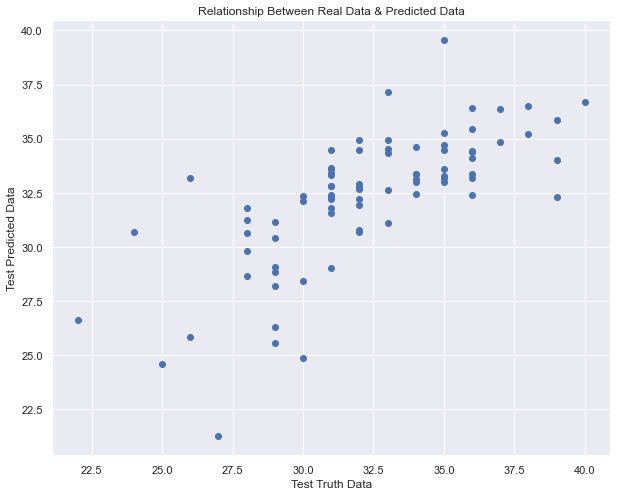

In [73]:
## If we get Linear Manner, it is good Linear Model.
plt.scatter(Y_test,reg_pred)  
plt.title("Relationship Between Real Data & Predicted Data")
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")      

Residual

In [74]:
## Calculating Residual
residuals = Y_test - reg_pred

In [75]:
residuals

24    -1.814710
6     -1.950312
152   -2.626407
233    0.652517
239   -2.124394
176    6.697282
216   -3.238074
150    2.135318
9     -3.793201
113   -0.545690
45    -0.668251
210   -4.549110
228   -2.473017
171    1.569754
82     1.892060
161    0.992079
237   -7.179555
15     3.441809
66    -0.755409
127    0.298933
33     1.911305
19     1.564909
108   -2.621175
30    -0.075604
186    1.510076
164    4.975684
10    -2.389461
73     1.413186
93    -4.610654
155    0.637102
111   -1.806806
218   -2.362597
25    -1.218457
60     1.985043
18    -1.390016
126   -0.894370
96    -2.151754
197    0.534142
137    2.684026
241    5.718228
75     1.603424
117   -2.336902
112   -3.481353
16     5.149406
196    0.609108
67    -0.756244
168    1.301405
38     1.210278
181    2.805726
115    0.141478
208   -4.150528
158    2.766443
132   -2.575421
84    -0.633417
55     2.618474
86    -1.311859
162    1.574906
179    0.367094
225   -0.799956
231   -0.432283
154    0.855492
97    -1.403722
141    1

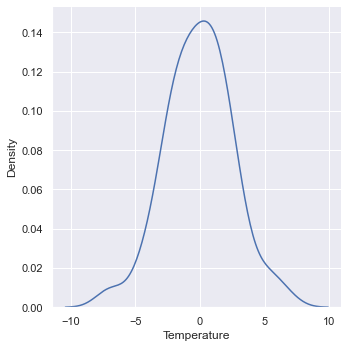

In [76]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals, kind ="kde")

Observation:
- Here the Distribution is Little Left Skewed

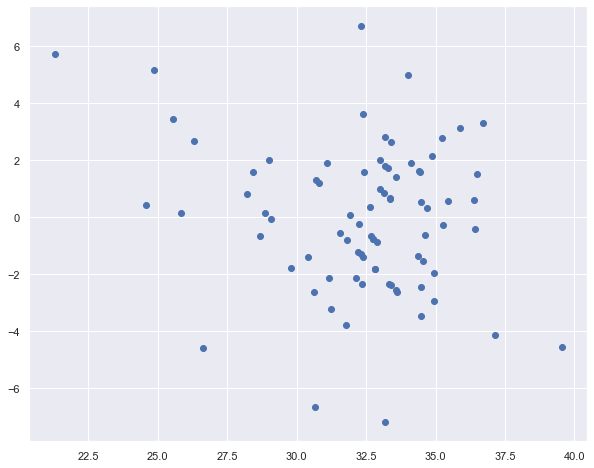

In [77]:
## Scatter Plot with predictions and residual
plt.scatter(reg_pred, residuals)

### Performance Metrics 

In [78]:
## Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Mean Squared Error is: ', mean_squared_error(Y_test, reg_pred))
print('Mean Absolute Error is: ', mean_absolute_error(Y_test,reg_pred))
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(Y_test, reg_pred)))

Mean Squared Error is:  6.602827501073089
Mean Absolute Error is:  2.022977373855728
Root Mean Squared Error is:  2.5695967584570716


$\textrm{R}^2$

In [79]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.48552145700274885


$\textrm{Adjusted R}^2$

In [80]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.3763896448518168

# Ridge Regression Model Prediction

In [81]:
## import Ridge Regression 
from sklearn.linear_model import Ridge

In [82]:
ridge=Ridge()

In [83]:
ridge.fit(X_train,Y_train)

Ridge()

### Coefficients and the intercept 

In [84]:
## the coefficients
print('The coefficients are: ', ridge.coef_)

The coefficients are:  [-0.4706728  -0.14323299  0.         -1.12141104 -0.71782883  0.35059246
  1.56290427  0.43618699  0.93040831  0.36434113 -0.41031485 -0.32504007
  0.16268849 -0.05428869]


In [85]:
## the intercept
print('The intercept is: ', ridge.intercept_)

The intercept is:  32.098765432098766


In [86]:
## Prediction for the Test data
ridge_pred = ridge.predict(X_test)

In [87]:
ridge_pred

array([32.84871722, 34.81949869, 30.61638697, 33.49980477, 32.06445862,
       32.48127955, 31.24158533, 34.82146564, 31.7914531 , 31.58041098,
       28.65881238, 34.88285653, 34.48859994, 34.31990085, 34.32533237,
       33.07634701, 33.15568758, 25.68550275, 32.65062571, 34.63727833,
       31.04421479, 28.3020695 , 33.60687589, 29.0769275 , 36.65940932,
       34.28924112, 33.35955946, 33.67032   , 26.56574543, 33.22902943,
       29.83608875, 32.33801671, 32.1595456 , 33.19054669, 32.32542983,
       32.8506445 , 31.06548316, 34.4775631 , 26.43459165, 21.43677855,
       34.31755269, 33.23342193, 34.48081827, 24.93032942, 36.12184644,
       32.66774448, 30.68387092, 30.87052071, 32.96893482, 28.84210078,
       36.75532086, 35.14074168, 33.756974  , 34.90912993, 33.34408477,
       32.6159972 , 32.46181631, 32.48140791, 31.7988268 , 36.40906689,
       33.07138223, 30.17955752, 29.04390161, 36.74090255, 31.94291664,
       32.30162488, 33.29212594, 34.26112935, 35.1371874 , 24.64

### Assumptions of Ridge Regression

Text(0, 0.5, 'Test Predicted Data')

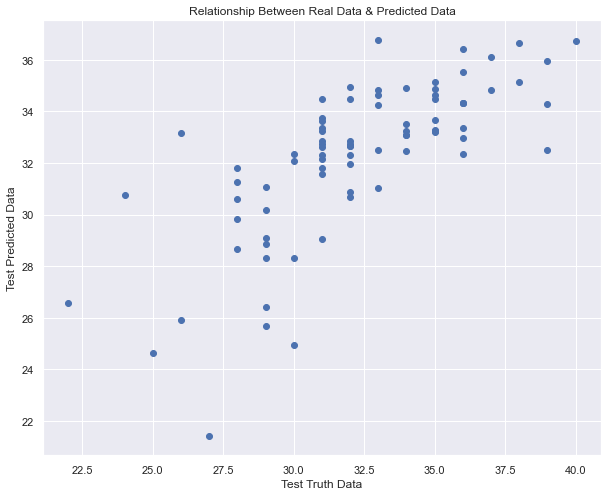

In [88]:
## IF we get Linear Manner, it is good Linear Model.
plt.scatter(Y_test,ridge_pred)  
plt.title("Relationship Between Real Data & Predicted Data")
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

Residuals

In [89]:
residuals=Y_test- ridge_pred

In [90]:
residuals

24    -1.848717
6     -1.819499
152   -2.616387
233    0.500195
239   -2.064459
176    6.518720
216   -3.241585
150    2.178534
9     -3.791453
113   -0.580411
45    -0.658812
210    0.117143
228   -2.488600
171    1.680099
82     1.674668
161    0.923653
237   -7.155688
15     3.314497
66    -0.650626
127    0.362722
33     1.955785
19     1.697931
108   -2.606876
30    -0.076927
186    1.340591
164    4.710759
10    -2.359559
73     1.329680
93    -4.565745
155    0.770971
111   -1.836089
218   -2.338017
25    -1.159546
60     1.809453
18    -1.325430
126   -0.850644
96    -2.065483
197    0.522437
137    2.565408
241    5.563221
75     1.682447
117   -2.233422
112   -3.480818
16     5.069671
196    0.878154
67    -0.667744
168    1.316129
38     1.129479
181    3.031065
115    0.157899
208   -3.755321
158    2.859258
132   -2.756974
84    -0.909130
55     2.655915
86    -1.615997
162    1.538184
179    0.518592
225   -0.798827
231   -0.409067
154    0.928618
97    -1.179558
141    1

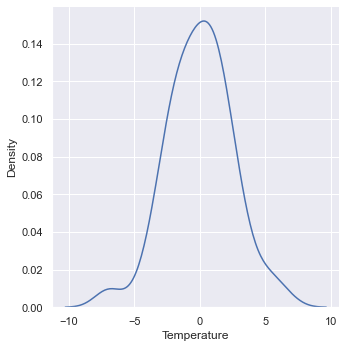

In [91]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

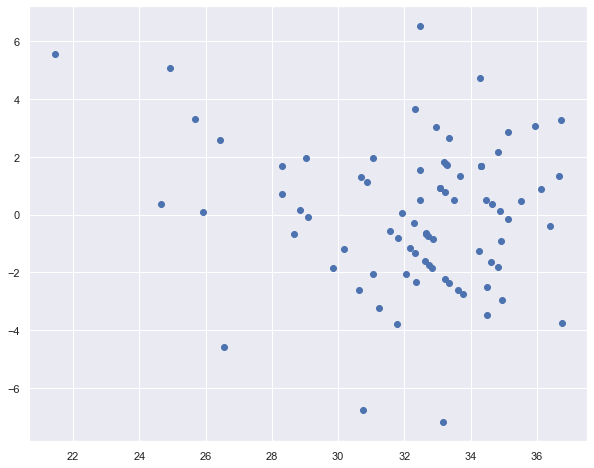

In [92]:
## Scatter plot with predictions and residual
plt.scatter(ridge_pred,residuals)

### Performance Metrics

In [93]:
print('Mean Squared Error is: ', mean_squared_error(Y_test,ridge_pred))
print('Mean Absolute Error is: ', mean_absolute_error(Y_test,ridge_pred))
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(Y_test,ridge_pred)))

Mean Squared Error is:  6.196453654949601
Mean Absolute Error is:  1.947547572280577
Root Mean Squared Error is:  2.48926769451371


$\textrm{R}^2$

In [94]:
score=r2_score(Y_test,ridge_pred)
print(score)

0.5171852592498655


$\textrm{Adjusted R}^2$

In [95]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.4147700112119582

# Lasso Regression Model Prediction

In [96]:
## import Lasso Regression
from sklearn.linear_model import Lasso

In [97]:
lasso = Lasso()

In [98]:
lasso.fit(X_train,Y_train)

Lasso()

### coefficients and the intercept

In [99]:
## the coefficients
print('The coefficients are: ', lasso.coef_)


The coefficients are:  [ 0.          0.          0.         -0.71322387 -0.         -0.
  1.0466751   0.          0.          0.          0.          0.
 -0.          0.        ]


In [100]:
## the Intercept
print('The Intercept is: ',lasso.intercept_)

The Intercept is:  32.098765432098766


In [101]:
## Prediction for the Test data
lasso_pred = lasso.predict(X_test)

In [102]:
lasso_pred

array([32.71498993, 33.30413649, 31.30001437, 32.46912413, 32.57098185,
       31.76046361, 31.85604499, 34.01682715, 30.99883434, 32.72585794,
       31.09788431, 32.54255687, 33.48458018, 33.62118884, 33.32291584,
       32.65584414, 31.55276769, 27.7754911 , 32.16682101, 32.9711622 ,
       31.55721045, 29.95949536, 33.36277038, 30.54068094, 34.62699925,
       33.51249324, 32.50438699, 32.78500373, 27.50456962, 33.09807559,
       31.54409624, 31.47760066, 32.72238936, 32.75198708, 32.64216839,
       32.19590681, 31.75245299, 33.36848516, 28.70725759, 28.59626616,
       32.82715411, 32.8453719 , 33.22672327, 27.86428425, 34.24733254,
       32.46111351, 31.74673821, 31.03644268, 33.26030147, 31.30567951,
       34.41297737, 33.59332541, 34.05550894, 32.87777737, 33.4259463 ,
       31.9789779 , 32.216982  , 33.10889395, 32.14748011, 34.48584856,
       32.94952546, 31.43029706, 30.37161718, 34.84785902, 32.19590681,
       32.84710619, 33.0058635 , 33.546633  , 34.26784618, 28.27

### Assumptions of Lasso Regression 

Text(0, 0.5, 'Test Predicted Data')

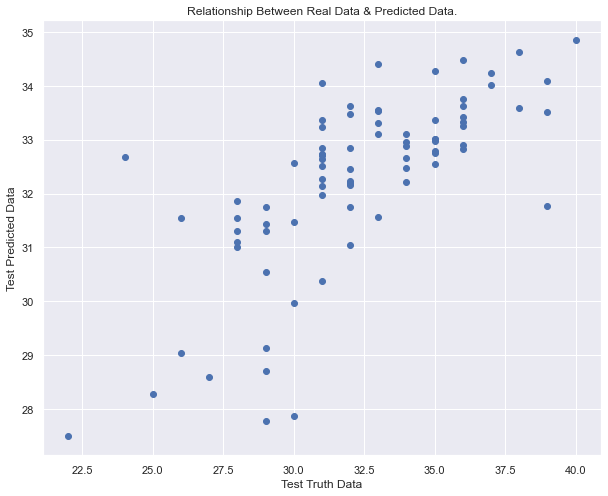

In [103]:
## IF we get Linear Manner, it is good Linear Model.

plt.scatter(Y_test,lasso_pred)       
plt.title("Relationship Between Real Data & Predicted Data.")
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

Residuals

In [104]:
residuals=Y_test- lasso_pred

In [105]:
residuals

24    -1.714990
6     -0.304136
152   -3.300014
233    1.530876
239   -2.570982
176    7.239536
216   -3.856045
150    2.983173
9     -2.998834
113   -1.725858
45    -3.097884
210    2.457443
228   -1.484580
171    2.378811
82     2.677084
161    1.344156
237   -5.552768
15     1.224509
66    -0.166821
127    2.028838
33     1.442790
19     0.040505
108   -2.362770
30    -1.540681
186    3.373001
164    5.487507
10    -1.504387
73     2.214996
93    -5.504570
155    0.901924
111   -3.544096
218   -1.477601
25    -1.722389
60     2.248013
18    -1.642168
126   -0.195907
96    -2.752453
197    1.631515
137    0.292742
241   -1.596266
75     3.172846
117   -1.845372
112   -2.226723
16     2.135716
196    2.752667
67    -0.461114
168    0.253262
38     0.963557
181    2.739699
115   -2.305680
208   -1.412977
158    4.406675
132   -3.055509
84     1.122223
55     2.574054
86    -0.978978
162    1.783018
179   -0.108894
225   -1.147480
231    1.514151
154    1.050475
97    -2.430297
141    0

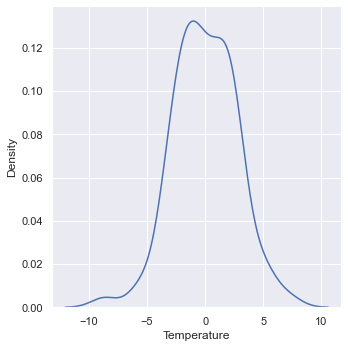

In [106]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

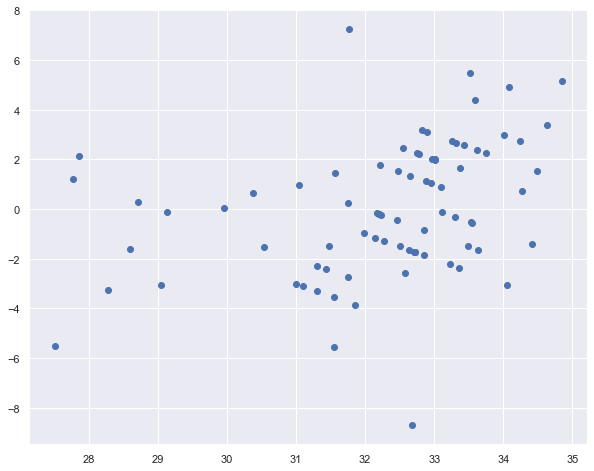

In [107]:
## SCatter plot with predictions and residual
plt.scatter(lasso_pred,residuals)

### Performance Metrics 

In [108]:
print('Mean Squared Error is: ', mean_squared_error(Y_test, lasso_pred))
print('Mean Absolute Error is: ', mean_absolute_error(Y_test, lasso_pred))
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(Y_test, lasso_pred)))

Mean Squared Error is:  7.177068723026321
Mean Absolute Error is:  2.144527529507031
Root Mean Squared Error is:  2.6790051741320546


$\textrm{R}^2$

In [109]:
score=r2_score(Y_test, lasso_pred)
print(score)

0.44077777906304116


$\textrm{Adjusted R}^2$

In [110]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.32215488371277723

# Elastic Net Regression Model Prediction 

In [111]:
## import Elastic Net Regression
from sklearn.linear_model import ElasticNet

In [112]:
elastic = ElasticNet()

In [113]:
elastic.fit(X_train, Y_train)

ElasticNet()

In [114]:
elastic.fit(X_train, Y_train)

ElasticNet()

### coefficients and the intercept 

In [115]:
## the coefficients
print('The coefficients are: ',elastic.coef_)

The coefficients are:  [-0.         -0.          0.         -0.67741409 -0.20333826 -0.
  0.73141438  0.08505131  0.          0.23680377  0.05564769  0.15761618
 -0.07617223  0.        ]


In [116]:
## the Intercepts
print('The Intercepts are: ',elastic.intercept_)

The Intercepts are:  32.098765432098766


In [117]:
## Prediction for the Test data
elastic_pred = elastic.predict(X_test)

In [118]:
elastic_pred

array([32.70092293, 33.34573444, 30.86574254, 32.36459169, 32.56803786,
       31.89526011, 31.53114908, 34.05003824, 30.95620591, 32.07688309,
       30.2905202 , 32.55147875, 33.65318325, 33.98655796, 33.6923239 ,
       32.15937393, 32.13178926, 28.32766689, 32.18037762, 32.98845918,
       31.00710603, 29.8091145 , 33.26146166, 30.12426497, 35.25947177,
       33.43754291, 32.44903692, 32.86315454, 28.00914733, 32.94538519,
       31.28953209, 31.44812919, 32.6091309 , 32.98047874, 32.09945865,
       31.84803444, 31.40535957, 33.36938409, 28.88449356, 27.73051013,
       32.9128803 , 32.65915878, 33.47564301, 28.1516722 , 34.70871295,
       32.3715637 , 31.65145252, 30.91185768, 33.41758808, 30.75311661,
       35.45890168, 33.54415635, 34.0520061 , 33.61793419, 33.43508692,
       32.18795273, 31.82878744, 33.04985949, 32.01802643, 34.89959005,
       32.6277301 , 30.75592095, 30.33763864, 35.52009149, 31.65787124,
       32.46739381, 32.90801108, 33.33643328, 34.22438615, 28.09

### Assumptions of ElasticNet Regression

Text(0, 0.5, 'Test Predicted Data')

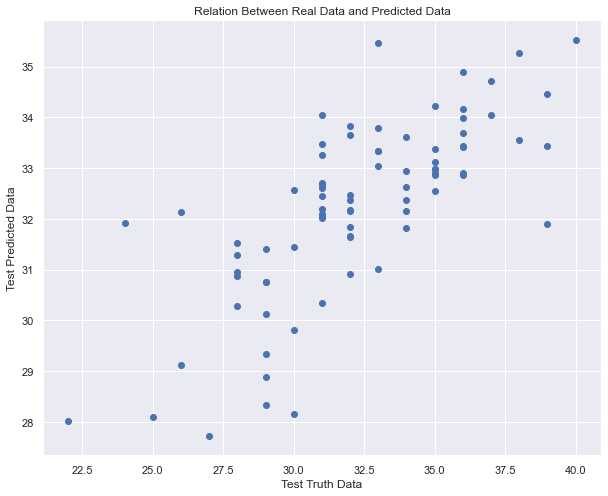

In [119]:
## If we get Linear Manner, it is good Linear Model.
plt.scatter(Y_test,elastic_pred) 
plt.title('Relation Between Real Data and Predicted Data')
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

Residuals

In [120]:
residuals=Y_test- elastic_pred

In [121]:
residuals

24    -1.700923
6     -0.345734
152   -2.865743
233    1.635408
239   -2.568038
176    7.104740
216   -3.531149
150    2.949962
9     -2.956206
113   -1.076883
45    -2.290520
210    2.448521
228   -1.653183
171    2.013442
82     2.307676
161    1.840626
237   -6.131789
15     0.672333
66    -0.180378
127    2.011541
33     1.992894
19     0.190886
108   -2.261462
30    -1.124265
186    2.740528
164    5.562457
10    -1.449037
73     2.136845
93    -6.009147
155    1.054615
111   -3.289532
218   -1.448129
25    -1.609131
60     2.019521
18    -1.099459
126    0.151966
96    -2.405360
197    1.630616
137    0.115506
241   -0.730510
75     3.087120
117   -1.659159
112   -2.475643
16     1.848328
196    2.291287
67    -0.371564
168    0.348547
38     1.088142
181    2.582412
115   -1.753117
208   -2.458902
158    4.455844
132   -3.052006
84     0.382066
55     2.564913
86    -1.187953
162    2.171213
179   -0.049859
225   -1.018026
231    1.100410
154    1.372270
97    -1.755921
141    0

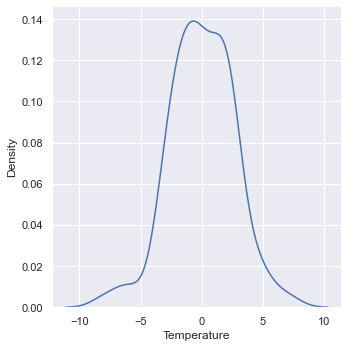

In [122]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

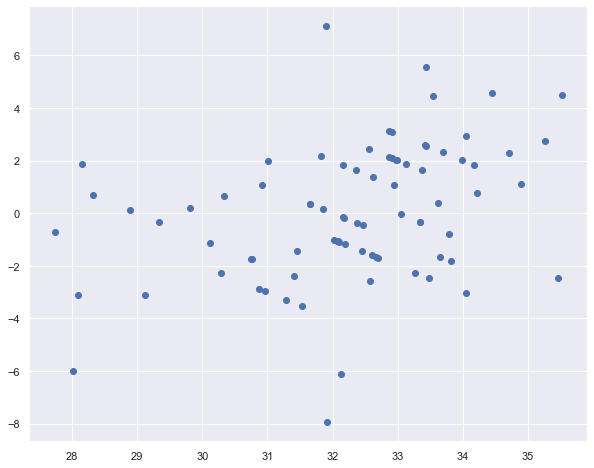

In [123]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(elastic_pred,residuals)

### Performance metrics 

In [124]:
print('Mean Squared Error is: ', mean_squared_error(Y_test,elastic_pred))
print('Mean Absolute Error is: ', mean_absolute_error(Y_test,elastic_pred))
print('Root Mean Squared Error is: ',np.sqrt(mean_squared_error(Y_test,elastic_pred)))

Mean Squared Error is:  6.635917488505456
Mean Absolute Error is:  2.0398594824104657
Root Mean Squared Error is:  2.5760274626846384


$\textrm{R}^2$

In [125]:
score=r2_score(Y_test,elastic_pred)
print(score)

0.482943154219701


$\textrm{Adjusted R}^2$

In [126]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.3732644293572134

# Thank you!